In [1163]:
#importing necessary libraries
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder, LabelEncoder, PowerTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,roc_curve, roc_auc_score, plot_roc_curve
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor,RandomForestClassifier, BaggingClassifier
from sklearn.metrics import confusion_matrix, classification_report
from scipy.stats import norm, stats
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import statistics as st
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import time


#import plotty
import warnings
warnings.filterwarnings('ignore')

In [1164]:
df = pd.read_csv("C://Users//hp-pc//Desktop//Internship22//Car-Price_Prediction--1-//Car Price Prediction//scrape_code.csv")
df #read the csv file

,Unnamed: 0,Brand_Name,Car_Name,Location,Km_Driven,Gear_Type,Fuel,Owner,EMI,Price
0,0,2017 Maruti Alto K10,VXI Manual,New Delhi,"50,739 km",Manual,Petrol,1st Owner,"₹7,721/month","₹3,47,099"
1,1,2014 Maruti Alto K10,VXI Manual,New Delhi,"45,043 km",Manual,Petrol,2nd Owner,"₹6,197/month","₹2,78,599"
2,2,2014 Maruti Alto K10,VXI Manual,New Delhi,"70,313 km",Manual,Petrol,3rd Owner,"₹5,839/month","₹2,62,499"
3,4,2012 Maruti Swift,VXI Manual,New Delhi,"27,252 km",Manual,Petrol,1st Owner,"₹7,992/month","₹3,59,299"
4,5,2014 Maruti Swift,VXI Manual,New Delhi,"1,70,926 km",Manual,Petrol,1st Owner,"₹8,168/month","₹3,67,199"
...,...,...,...,...,...,...,...,...,...,...
6416,31686,2011 BMW 5 Series,525D 3.0 Automatic,Pune,"39,176 km",Automatic,Diesel,2nd Owner,"₹29,685/month","₹13,34,499"
6417,31700,2015 Mercedes Benz CLA Class,CLA 200 CDI SPORT Manual,Pune,"19,088 km",Manual,Diesel,1st Owner,"₹46,075/month","₹20,71,299"
6418,31707,2019 Honda Civic,VX CVT i-VTEC,Pune,"9,118 km",Automatic,Petrol,1st Owner,"₹40,507/month","₹18,20,999"
6419,31719,2016 Ford Ecosport,1.5TITANIUM TDCI Manual,Pune,"49,395 km",Manual,Diesel,1st Owner,"₹15,157/month","₹6,81,399"


In [1165]:
df.shape #check the shape of the column

(6421, 10)

In [1166]:
df.duplicated().sum() #check the duplicate rows 

0

In [1167]:
df.isnull().sum() #check the null values

Unnamed: 0    0
Brand_Name    0
Car_Name      0
Location      0
Km_Driven     0
Gear_Type     0
Fuel          0
Owner         0
EMI           0
Price         0
dtype: int64

In [1168]:
df.all() #check the zero values 

Unnamed: 0    False
Brand_Name     True
Car_Name       True
Location       True
Km_Driven      True
Gear_Type      True
Fuel           True
Owner          True
EMI            True
Price          True
dtype: bool

In [1169]:
df.columns #check the columns

Index(['Unnamed: 0', 'Brand_Name', 'Car_Name', 'Location', 'Km_Driven',
       'Gear_Type', 'Fuel', 'Owner', 'EMI', 'Price'],
      dtype='object')

# Datacleaning

In [1170]:
df['Brand_Name'].unique() #check the unique values

array(['2017 Maruti Alto K10', '2014 Maruti Alto K10',
       '2012 Maruti Swift', '2014 Maruti Swift', '2013 Maruti Swift',
       '2015 Maruti Swift', '2015 Maruti Swift Dzire',
       '2016 Maruti Swift Dzire', '2014 Maruti Ritz',
       '2014 Maruti Swift Dzire', '2019 Maruti Alto', '2013 Hyundai i20',
       '2015 Maruti Baleno', '2020 Maruti Baleno', '2017 Maruti Baleno',
       '2014 Honda City', '2017 Honda City', '2018 Maruti Baleno',
       '2017 Maruti Ertiga', '2013 Toyota Innova',
       '2016 Maruti Vitara Brezza', '2014 Toyota Corolla Altis',
       '2017 Maruti Vitara Brezza', '2013 Hyundai New Elantra',
       '2019 Maruti Vitara Brezza', '2014 Toyota Innova',
       '2014 Nissan Terrano', '2013 Mercedes Benz E Class',
       '2012 Volvo S60', '2012 Maruti Swift Dzire', '2013 BMW X3',
       '2016 Hyundai Creta', '2015 Hyundai Creta', '2014 Hyundai Xcent',
       '2018 Hyundai Tucson New', '2017 Hyundai Tucson New',
       '2017 Hyundai Creta', '2016 Nissan Terrano', '

In [1171]:
df['Car_Name'].unique() #check the unique values

array(['VXI Manual', 'VDI Manual', 'VDI ABS Manual', 'ZDI Manual',
       'VDI BS IV Manual', 'ERA 1.4 CRDI Manual',
       'SPORTZ 1.4 CRDI Manual', 'LXI Manual', 'DELTA 1.2 K12 Manual',
       'ZETA 1.2 K12 Manual', 'SV MT PETROL Manual', 'VDI SHVS Manual',
       '2.5 VX 7 STR BS IV Manual', 'D 4D J Manual', 'VDI OPT Manual',
       'S 1.6 MT Manual', 'XV 110 DIESEL Manual', 'D 4D G Manual',
       'E 250 CDI AVANTGARDE Manual', 'SUMMUM D5 Automatic',
       '2.5 VX 8 STR BS IV Manual', 'XDRIVE 20D Automatic',
       '1.6 SX CRDI Manual', '1.6 SX (O) CRDI Manual', 'BASE 1.2 Manual',
       '2WD AT GL DIESEL Automatic', '2WD AT GLS DIESEL Automatic',
       '4WD AT GLS DIESEL Automatic', '1.4 E PLUS CRDI', 'XL P Manual',
       '1.5TITANIUM TDCI Manual', '1.5 TITANIUM TI VCT Manual',
       'XV PREMIUM 110 PS AMT DEISEL Automatic', 'ALPHA 1.3 Manual',
       'T8 Manual', 'LXI 1.0 L Manual', 'ZXI 1.2 Manual',
       'ALPHA 1.6 Manual', '1.2 i-VTEC VX MT Manual',
       'ZXI OPT AMT Au

In [1172]:
df['Location'].unique() #check the unique values

array(['New Delhi', 'Bengaluru', 'Mumbai', 'Chennai', 'Hyderabad',
       'Kolkata', 'Ahemdabad', 'Pune'], dtype=object)

In [1173]:
df['Km_Driven'].unique() #check the unique values

array(['50,739 km', '45,043 km', '70,313 km', ..., '74,780 km',
       '39,630 km', '17,362 km'], dtype=object)

In [1174]:
df['Gear_Type'].unique() #check the unique values

array(['Manual', 'Automatic'], dtype=object)

In [1175]:
df['Fuel'].unique() #check the unique values

array(['Petrol', 'Diesel', 'Petrol + CNG', 'Petrol + LPG'], dtype=object)

In [1176]:
df['Owner'].unique() #check the unique values

array(['1st Owner', '2nd Owner', '3rd Owner', '4th Owner'], dtype=object)

In [1177]:
df['EMI'].unique() #check the unique values

array(['₹7,721/month', '₹6,197/month', '₹5,839/month', ...,
       '₹13,017/month', '₹17,880/month', '₹20,156/month'], dtype=object)

In [1178]:
df['Price'].unique() #check the unique values

array(['₹3,47,099', '₹2,78,599', '₹2,62,499', ..., '₹5,85,199',
       '₹8,03,799', '₹9,06,099'], dtype=object)

In [ ]:
#splitting the columns

In [1179]:
#extracting purchase year from the column by using split, slice and join command
df['Year of Purchase'] = df['Brand_Name'].str.split(' ').str.slice(0,1).str.join('')

In [1180]:
#extracting Brand name from the column by using split, slice and join command
df['Brand_name'] = df['Brand_Name'].str.split(' ').str.slice(1,2).str.join('')

In [1181]:
#extracting car name from the column by using split, slice and join command
df['Car_name'] = df['Brand_Name'].str.split(' ').str.slice(2,).str.join(" ")

In [1182]:
#extracting model name from the column by using split, slice and join command
df['Model_name'] = df['Car_Name'].str.split(' ').str.slice(0,1).str.join('')

In [1183]:
#extracting km_driven from the column by using split, slice and join command
df['Km_Driven'] = df['Km_Driven'].str.split(' ').str.slice(0,1).str.join('').str.replace(',','') 

In [1184]:
#extracting actual numerical value from the column 'EMI' by using split, slice and join command
df['EMI'] = df['EMI'].str.split('').str.slice(2,).str.join('').str.split('/').str.slice(0,1).str.join('').str.replace(',','')

In [1185]:
#extracting km_driven from the column by using split, slice and join command
df['Price'] = df['Price'].str.split('').str.slice(2,).str.join('').str.replace(',','')

In [1186]:
df.drop(columns='Unnamed: 0',inplace=True) #drop the unncessary column

In [1187]:
df.drop(columns='Car_Name', inplace = True) #drop the unncessary column

In [1188]:
df.drop(columns = 'Brand_Name',inplace = True) #drop the unncessary column

In [1189]:
df.head()

,Location,Km_Driven,Gear_Type,Fuel,Owner,EMI,Price,Year of Purchase,Brand_name,Car_name,Model_name
0,New Delhi,50739,Manual,Petrol,1st Owner,7721,347099,2017,Maruti,Alto K10,VXI
1,New Delhi,45043,Manual,Petrol,2nd Owner,6197,278599,2014,Maruti,Alto K10,VXI
2,New Delhi,70313,Manual,Petrol,3rd Owner,5839,262499,2014,Maruti,Alto K10,VXI
3,New Delhi,27252,Manual,Petrol,1st Owner,7992,359299,2012,Maruti,Swift,VXI
4,New Delhi,170926,Manual,Petrol,1st Owner,8168,367199,2014,Maruti,Swift,VXI


In [828]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6421 entries, 0 to 6420
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Location          6421 non-null   object
 1   Km_Driven         6421 non-null   object
 2   Gear_Type         6421 non-null   object
 3   Fuel              6421 non-null   object
 4   Owner             6421 non-null   object
 5   EMI               6421 non-null   object
 6   Price             6421 non-null   object
 7   Year of Purchase  6421 non-null   object
 8   Brand_name        6421 non-null   object
 9   Car_name          6421 non-null   object
 10  Model_name        6421 non-null   object
dtypes: object(11)
memory usage: 551.9+ KB


In [829]:
df['EMI'] = df['EMI'].astype(int) #converting into integer

In [830]:
df['Price'] = df['Price'].astype(int)#converting into integer

In [831]:
df['Year of Purchase'] = df['Year of Purchase'].astype(int)#converting into integer

In [832]:
df['Km_Driven'] = df['Km_Driven'].astype(int)#converting into integer

In [833]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6421 entries, 0 to 6420
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Location          6421 non-null   object
 1   Km_Driven         6421 non-null   int32 
 2   Gear_Type         6421 non-null   object
 3   Fuel              6421 non-null   object
 4   Owner             6421 non-null   object
 5   EMI               6421 non-null   int32 
 6   Price             6421 non-null   int32 
 7   Year of Purchase  6421 non-null   int32 
 8   Brand_name        6421 non-null   object
 9   Car_name          6421 non-null   object
 10  Model_name        6421 non-null   object
dtypes: int32(4), object(7)
memory usage: 451.6+ KB


Removing Outliers and Improving curve: 

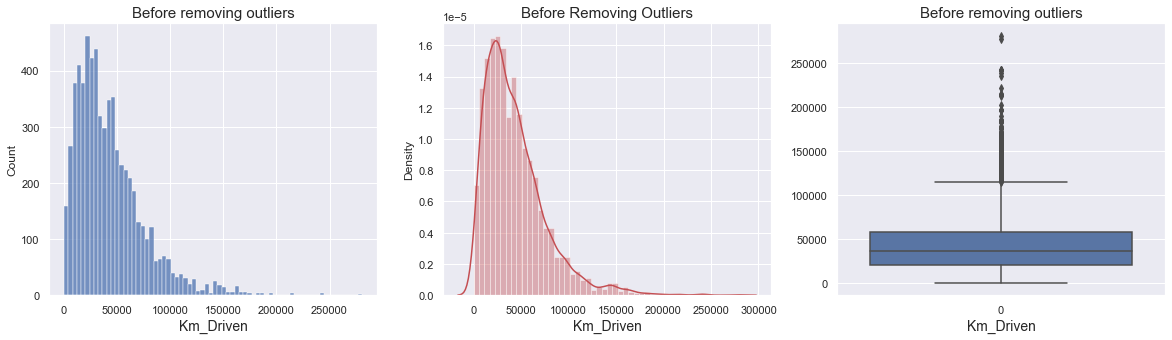

In [834]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['Km_Driven']) #visualize the outliers by using histplot
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('Km_Driven', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['Km_Driven'], color='r') #visualize the normalization curve by using distplot
plt.title('Before Removing Outliers', fontsize=15)
plt.xlabel('Km_Driven', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df['Km_Driven']) #visualize the outliers by using boxplot
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('Km_Driven', fontsize= 14)
plt.show()

In [835]:
#Detecting the outlier by using iqr method and removing them.
q1 = np.percentile(df['Km_Driven'], 30,
                   interpolation = 'midpoint')
 
q3 = np.percentile(df['Km_Driven'], 72,
                   interpolation = 'midpoint')
iqr = q3 - q1
print('Inter quartile range:------>',iqr)
print("\n",'*'*50)

# higher side 
higher_side = df['Km_Driven'] >= (q3+1.5*iqr)
print('Higher range:-\n',np.where(higher_side))
print("\n",'*'*50)
for i in np.where(higher_side):
    print('Total Number of Higher side Outlier is:-------->', len(i))
print("\n",'*'*50)

# lower side 
lower_side = df['Km_Driven'] <= (q1-1.5*iqr)
print('Lower range:- \n',np.where(lower_side))
print("\n",'*'*50)
for j in np.where(lower_side):
    print('Total Number of Lower side Outlier is:-------->', len(j))
print("\n",'*'*50)

Inter quartile range:------> 31485.0

 **************************************************
Higher range:-
 (array([   4,   11,   28,   33,   38,   39,   42,   46,   49,   53,   56,
         75,   93,   95,  104,  105,  109,  115,  116,  124,  133,  149,
        155,  156,  166,  181,  212,  213,  218,  220,  221,  228,  230,
        236,  242,  278,  283,  290,  348,  358,  376,  381,  394,  403,
        411,  437,  441,  462,  465,  473,  476,  482,  493,  494,  516,
        517,  544,  549,  589,  609,  622,  631,  658,  663,  689,  694,
        703,  705,  710,  712,  729,  738,  765,  784,  795,  796,  808,
        825,  836,  845,  850,  864,  890,  982, 1010, 1038, 1040, 1050,
       1053, 1063, 1065, 1068, 1082, 1104, 1114, 1148, 1170, 1196, 1350,
       1432, 1451, 1477, 1483, 1488, 1571, 1610, 1649, 1651, 1656, 1698,
       1714, 1747, 1815, 1832, 1835, 1839, 1849, 1918, 1934, 1938, 1969,
       2014, 2016, 2029, 2037, 2052, 2064, 2065, 2066, 2067, 2073, 2074,
       2075, 2083

In [836]:
#First print the old shape and then compare
print("old Shape:------> ", df.shape)
#removing the outliers
high=np.where(higher_side)
low=np.where(lower_side)
df=df.drop(df.index[high])
df=df.drop(df.index[low])
 
print("New Shape:------> ", df.shape)

old Shape:------>  (6421, 11)
New Shape:------>  (6078, 11)


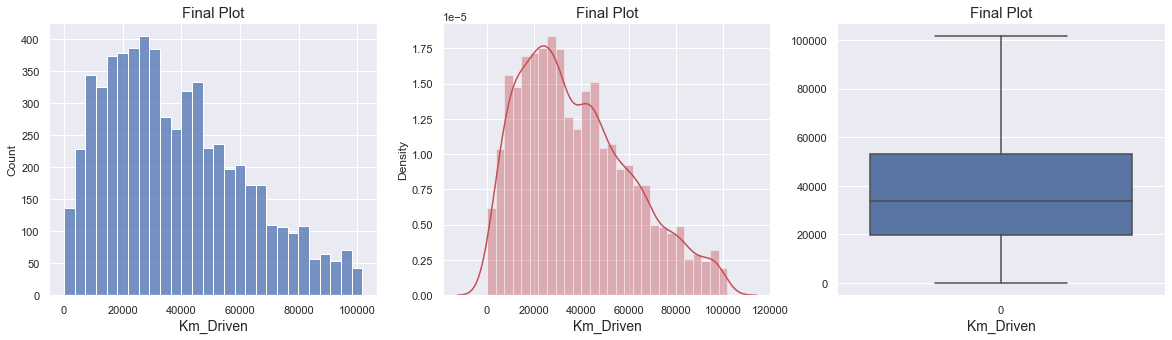

In [837]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['Km_Driven']) #visualize the outliers by using histplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('Km_Driven', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['Km_Driven'], color='r') #visualize the normalization curve by using distplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('Km_Driven', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df['Km_Driven']) #visualize the outliers by using boxplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('Km_Driven', fontsize= 14)
plt.show()

In [838]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['Km_Driven'].mean())
print('Median of the column:----->',df['Km_Driven'].median())
print('Mode of the column:----->',st.mode(df['Km_Driven']))
print('std of the column:----->',df['Km_Driven'].std())

Mean of the column:-----> 37980.50345508391
Median of the column:-----> 33722.5
Mode of the column:-----> 25636
std of the column:-----> 23531.955519671494


In [913]:
df['Km_Driven'] = df['Km_Driven'].replace(25636, df['Km_Driven'].mean())

In [914]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['Km_Driven'].mean())
print('Median of the column:----->',df['Km_Driven'].median())
print('Mode of the column:----->',st.mode(df['Km_Driven']))
print('std of the column:----->',df['Km_Driven'].std())

Mean of the column:-----> 38271.18219042866
Median of the column:-----> 33931.0
Mode of the column:-----> 38255.34862878652
std of the column:-----> 23537.425617502366


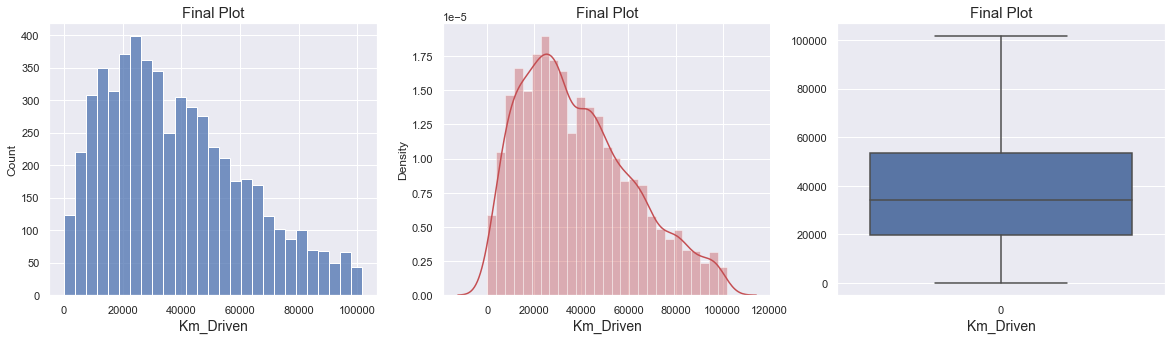

In [916]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['Km_Driven']) #visualize the outliers by using histplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('Km_Driven', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['Km_Driven'], color='r') #visualize the normalization curve by using distplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('Km_Driven', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df['Km_Driven']) #visualize the outliers by using boxplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('Km_Driven', fontsize= 14)
plt.show()

In [915]:
df['Km_Driven'].skew() #check the skewness

0.6043629541306829

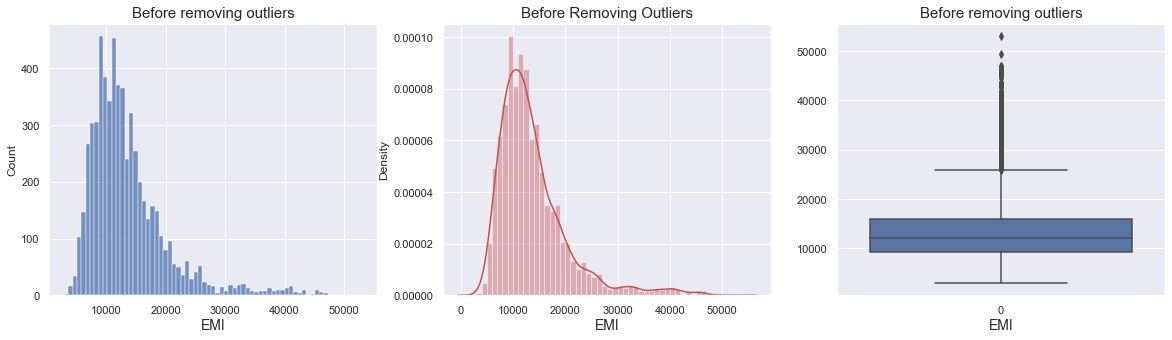

In [839]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['EMI']) #visualize the outliers by using histplot
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('EMI', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['EMI'], color='r') #visualize the normalization curve by using distplot
plt.title('Before Removing Outliers', fontsize=15)
plt.xlabel('EMI', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df['EMI']) #visualize the outliers by using boxplot
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('EMI', fontsize= 14)
plt.show()

In [840]:
#Detecting the outlier by using iqr method and removing them.
q1 = np.percentile(df['EMI'], 26,
                   interpolation = 'midpoint')
 
q3 = np.percentile(df['EMI'], 70,
                   interpolation = 'midpoint')
iqr = q3 - q1
print('Inter quartile range:------>',iqr)
print("\n",'*'*50)

# higher side 
higher_side = df['EMI'] >= (q3+1.5*iqr)
print('Higher range:-\n',np.where(higher_side))
print("\n",'*'*50)
for i in np.where(higher_side):
    print('Total Number of Higher side Outlier is:-------->', len(i))
print("\n",'*'*50)

# lower side 
lower_side = df['EMI'] <= (q1-1.5*iqr)
print('Lower range:- \n',np.where(lower_side))
print("\n",'*'*50)
for j in np.where(lower_side):
    print('Total Number of Lower side Outlier is:-------->', len(j))
print("\n",'*'*50)

Inter quartile range:------> 5485.0

 **************************************************
Higher range:-
 (array([  41,   44,   48,   49,   50,   52,   78,   87,   88,   90,   93,
        106,  108,  124,  156,  157,  161,  180,  227,  271,  282,  283,
        284,  285,  286,  287,  289,  302,  307,  308,  309,  312,  351,
        369,  405,  406,  417,  514,  663,  665,  685,  689,  691,  709,
        711,  722,  723,  725,  752,  763,  764,  765,  766,  775,  776,
        778,  779,  780,  782,  793,  807,  831,  873,  899,  906,  915,
        916,  917,  921,  922,  925, 1002, 1023, 1024, 1025, 1029, 1060,
       1071, 1072, 1073, 1076, 1078, 1118, 1236, 1237, 1242, 1261, 1262,
       1263, 1264, 1266, 1272, 1283, 1298, 1299, 1300, 1305, 1313, 1314,
       1315, 1320, 1341, 1342, 1343, 1345, 1376, 1377, 1381, 1391, 1407,
       1408, 1409, 1415, 1418, 1419, 1425, 1430, 1431, 1432, 1433, 1435,
       1438, 1439, 1440, 1442, 1443, 1446, 1447, 1453, 1457, 1458, 1459,
       1460, 1462,

In [841]:
#First print the old shape and then compare
print("old Shape:------> ", df.shape)
#removing the outliers
high=np.where(higher_side)
low=np.where(lower_side)
df=df.drop(df.index[high])
df=df.drop(df.index[low])
 
print("New Shape:------> ", df.shape)

old Shape:------>  (6078, 11)
New Shape:------>  (5579, 11)


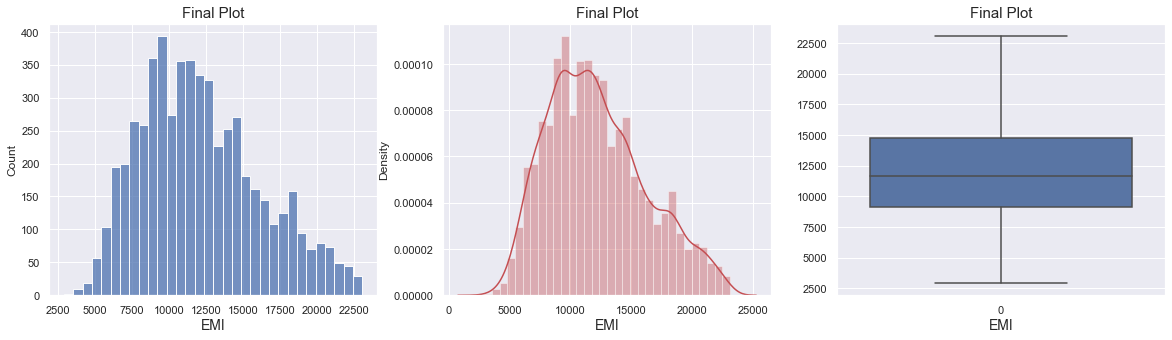

In [842]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['EMI']) #visualize the outliers by using histplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('EMI', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['EMI'], color='r') #visualize the normalization curve by using distplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('EMI', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df['EMI']) #visualize the outliers by using boxplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('EMI', fontsize= 14)
plt.show()

In [843]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['EMI'].mean())
print('Median of the column:----->',df['EMI'].median())
print('Mode of the column:----->',st.mode(df['EMI']))
print('std of the column:----->',df['EMI'].std())

Mean of the column:-----> 12172.904642409034
Median of the column:-----> 11634.0
Mode of the column:-----> 12915
std of the column:-----> 4050.297761282508


In [917]:
df['EMI'] = df['EMI'].replace(12915,df['EMI'].mean()) #replace the mode value by mean to improve the curve

In [918]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['EMI'].mean())
print('Median of the column:----->',df['EMI'].median())
print('Mode of the column:----->',st.mode(df['EMI']))
print('std of the column:----->',df['EMI'].std())

Mean of the column:-----> 12169.712262308272
Median of the column:-----> 11634.0
Mode of the column:-----> 12172.904642409034
std of the column:-----> 4050.003986018623


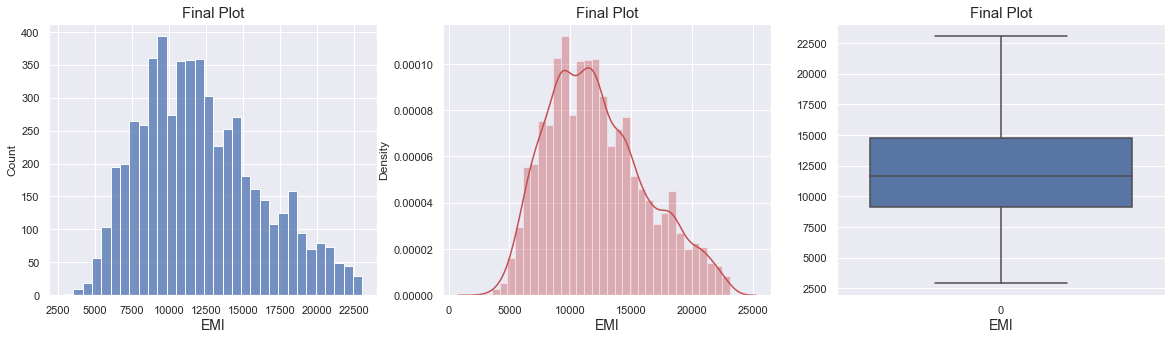

In [919]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['EMI']) #visualize the outliers by using histplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('EMI', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['EMI'], color='r') #visualize the normalization curve by using distplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('EMI', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df['EMI']) #visualize the outliers by using boxplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('EMI', fontsize= 14)
plt.show()

In [920]:
df['EMI'].skew() #check the skewness

0.4957820331280856

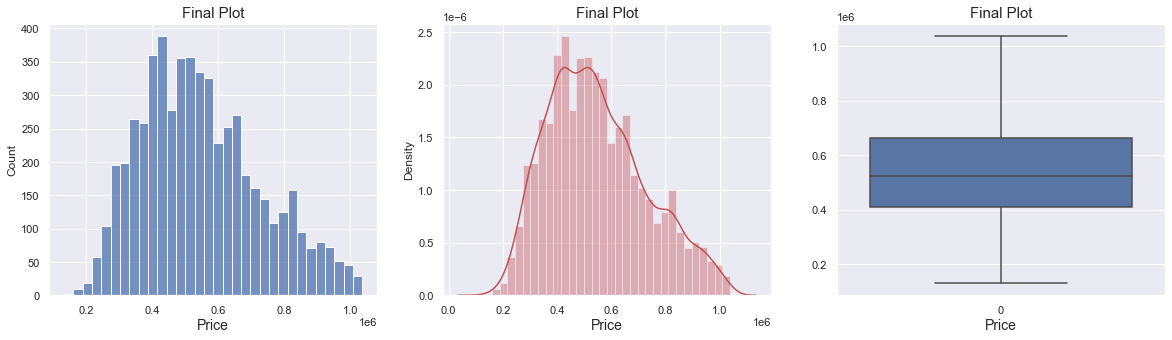

In [844]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['Price']) #visualize the outliers by using histplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('Price', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['Price'], color='r') #visualize the normalization curve by using distplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('Price', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df['Price']) #visualize the outliers by using boxplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('Price', fontsize= 14)
plt.show()

In [845]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['Price'].mean())
print('Median of the column:----->',df['Price'].median())
print('Mode of the column:----->',st.mode(df['Price']))
print('std of the column:----->',df['Price'].std())

Mean of the column:-----> 547233.6302204697
Median of the column:-----> 522999.0
Mode of the column:-----> 580599
std of the column:-----> 182081.53071041242


In [921]:
df['Price'] = df['Price'].replace(580599,df['Price'].mean())#replace the mode value by mean to improve the curve

In [922]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['Price'].mean())
print('Median of the column:----->',df['Price'].median())
print('Mode of the column:----->',st.mode(df['Price']))
print('std of the column:----->',df['Price'].std())

Mean of the column:-----> 547090.0975309715
Median of the column:-----> 522999.0
Mode of the column:-----> 547233.6302204697
std of the column:-----> 182068.32053024677


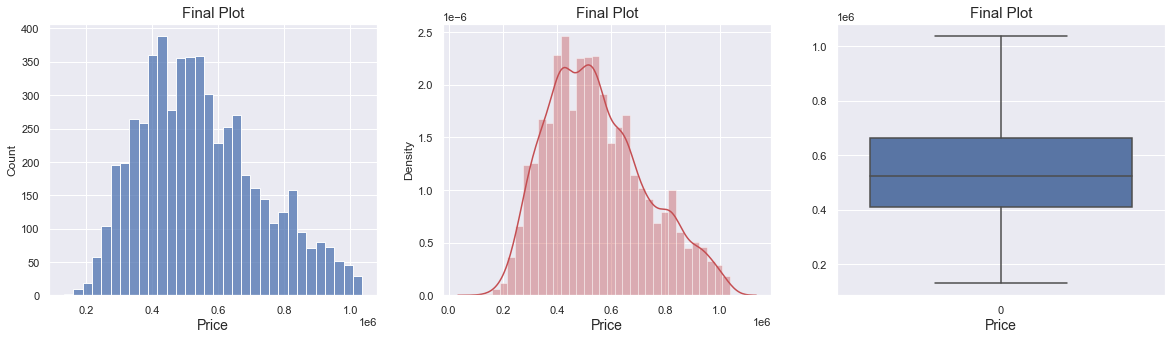

In [923]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['Price']) #visualize the outliers by using histplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('Price', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['Price'], color='r') #visualize the normalization curve by using distplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('Price', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df['Price']) #visualize the outliers by using boxplot
plt.title('Final Plot', fontsize=15)
plt.xlabel('Price', fontsize= 14)
plt.show()

In [924]:
df['Price'].skew() #check the skewness

0.49579499731022314

In [925]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (5579, 11)


# Data Analysis

In [926]:
df['Location'].value_counts() #check the count of unique values

Pune         1326
Mumbai       1267
New Delhi     927
Chennai       774
Ahemdabad     476
Kolkata       338
Bengaluru     250
Hyderabad     221
Name: Location, dtype: int64

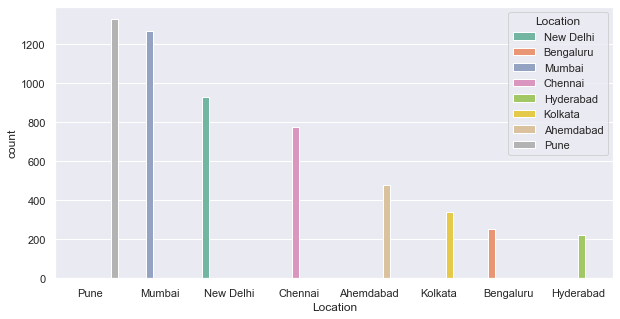

In [927]:
#plotting each class frequency
fig = plt.figure(figsize=(10,5))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Location",palette="Set2", data=df, hue = 'Location', order = df["Location"].value_counts().index)
plt.show()

Text(0, 0.5, 'Brand_name')

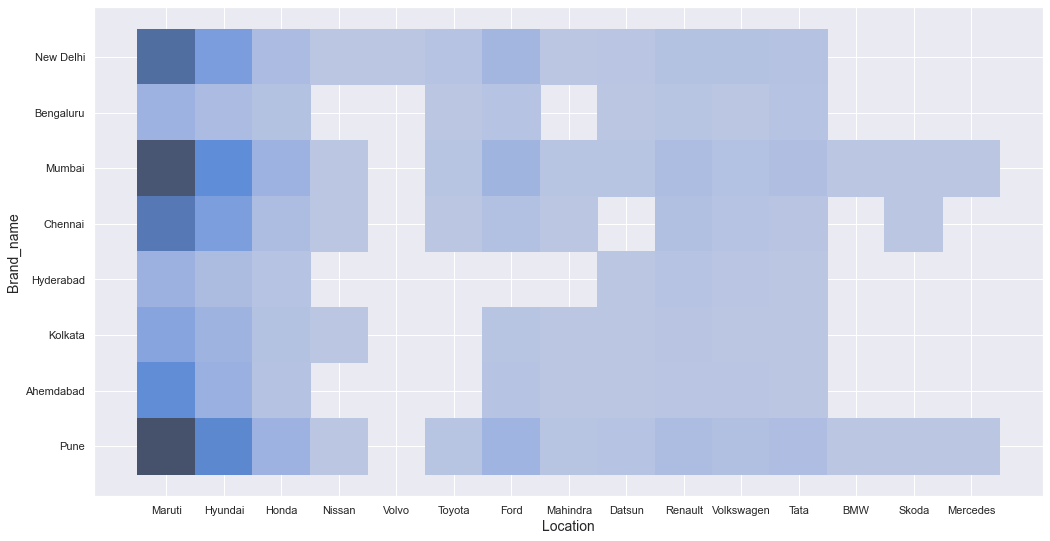

In [928]:
#visualize this column by histplot
plt.figure(figsize=(17,9))
sns.histplot(x= 'Brand_name',y= 'Location', data=df)
plt.xlabel('Location', fontsize = 14)
plt.ylabel('Brand_name', fontsize = 14)

Text(0, 0.5, 'Brand_name')

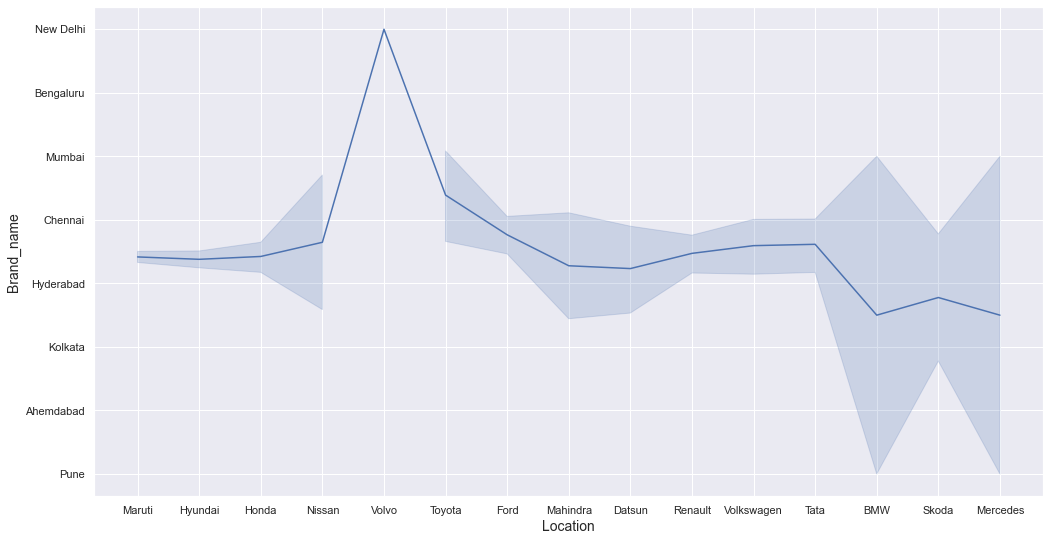

In [929]:
#visualize this column by histplot
plt.figure(figsize=(17,9))
sns.lineplot(x= 'Brand_name',y= 'Location', data=df)
plt.xlabel('Location', fontsize = 14)
plt.ylabel('Brand_name', fontsize = 14)

In [930]:
df.groupby('Location')['Gear_Type'].value_counts() #check the relationship between two feature

Location   Gear_Type
Ahemdabad  Manual        450
           Automatic      26
Bengaluru  Manual        199
           Automatic      51
Chennai    Manual        630
           Automatic     144
Hyderabad  Manual        180
           Automatic      41
Kolkata    Manual        323
           Automatic      15
Mumbai     Manual       1019
           Automatic     248
New Delhi  Manual        847
           Automatic      80
Pune       Manual       1071
           Automatic     255
Name: Gear_Type, dtype: int64

In [931]:
df.groupby('Location')['Gear_Type'].value_counts(normalize=True) #check the relationship between two feature

Location   Gear_Type
Ahemdabad  Manual       0.945378
           Automatic    0.054622
Bengaluru  Manual       0.796000
           Automatic    0.204000
Chennai    Manual       0.813953
           Automatic    0.186047
Hyderabad  Manual       0.814480
           Automatic    0.185520
Kolkata    Manual       0.955621
           Automatic    0.044379
Mumbai     Manual       0.804262
           Automatic    0.195738
New Delhi  Manual       0.913700
           Automatic    0.086300
Pune       Manual       0.807692
           Automatic    0.192308
Name: Gear_Type, dtype: float64

In [932]:
df.groupby('Location')['Fuel'].value_counts() #check the relationship between two feature

Location   Fuel        
Ahemdabad  Petrol           372
           Diesel           102
           Petrol + CNG       2
Bengaluru  Petrol           233
           Diesel            17
Chennai    Petrol           712
           Diesel            58
           Petrol + CNG       3
           Petrol + LPG       1
Hyderabad  Petrol           197
           Diesel            24
Kolkata    Petrol           321
           Diesel            17
Mumbai     Petrol           964
           Diesel           279
           Petrol + CNG      24
New Delhi  Petrol           588
           Diesel           328
           Petrol + CNG      11
Pune       Petrol          1014
           Diesel           287
           Petrol + CNG      25
Name: Fuel, dtype: int64

Text(0, 0.5, 'Km_Driven')

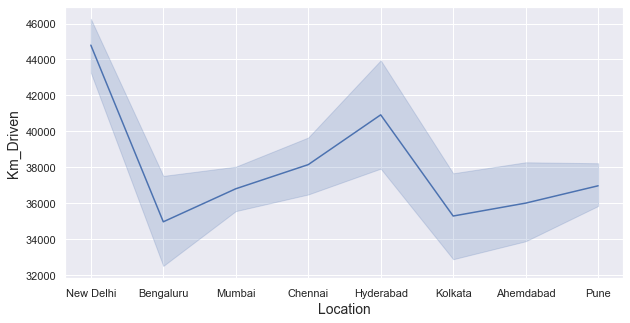

In [933]:
#visualize this column by histplot
plt.figure(figsize=(10,5))
sns.lineplot(y= 'Km_Driven',x= 'Location', data=df)
plt.xlabel('Location', fontsize = 14)
plt.ylabel('Km_Driven', fontsize = 14)

Text(0, 0.5, 'Price')

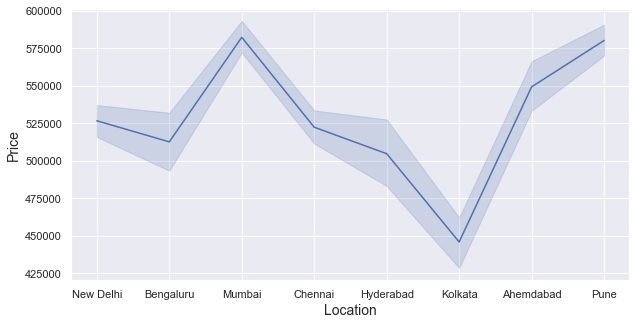

In [934]:
#visualize this column by histplot
plt.figure(figsize=(10,5))
sns.lineplot(y= 'Price',x= 'Location', data=df)
plt.xlabel('Location', fontsize = 14)
plt.ylabel('Price', fontsize = 14)

Text(0, 0.5, 'EMI')

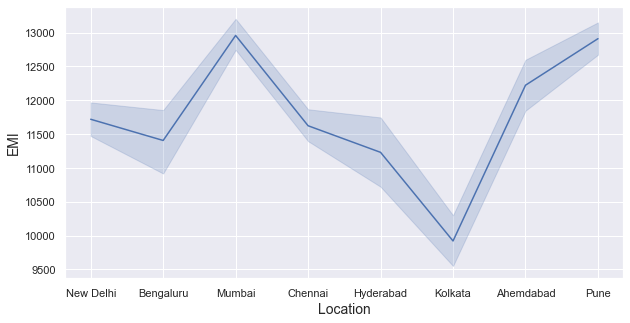

In [935]:
#visualize this column by histplot
plt.figure(figsize=(10,5))
sns.lineplot(y= 'EMI',x= 'Location', data=df)
plt.xlabel('Location', fontsize = 14)
plt.ylabel('EMI', fontsize = 14)

In [936]:
df['Gear_Type'].value_counts() #check the count of unique values

Manual       4719
Automatic     860
Name: Gear_Type, dtype: int64

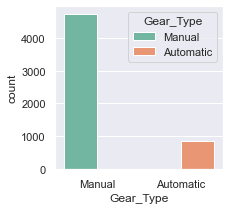

In [937]:
#plotting each class frequency
fig = plt.figure(figsize=(3,3))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Gear_Type",palette="Set2", data=df, hue = 'Gear_Type', order = df["Gear_Type"].value_counts().index)
plt.show()

Text(0, 0.5, 'Price')

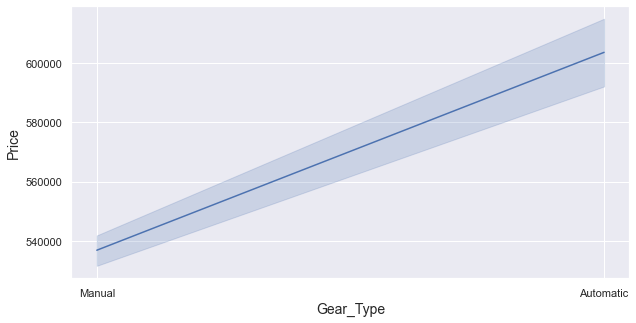

In [938]:
#visualize this column by histplot
plt.figure(figsize=(10,5))
sns.lineplot(y= 'Price',x= 'Gear_Type', data=df)
plt.xlabel('Gear_Type', fontsize = 14)
plt.ylabel('Price', fontsize = 14)

Text(0, 0.5, 'Brand_name')

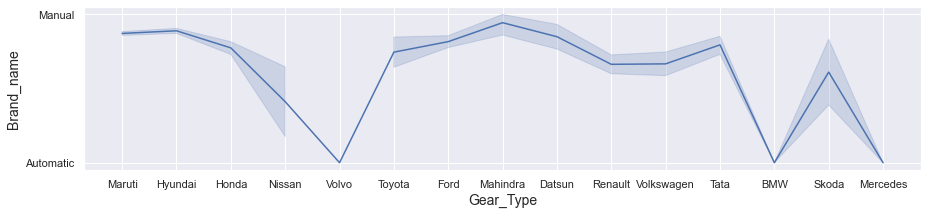

In [939]:
#visualize this column by histplot
plt.figure(figsize=(15,3))
sns.lineplot(x= 'Brand_name',y= 'Gear_Type', data=df)
plt.xlabel('Gear_Type', fontsize = 14)
plt.ylabel('Brand_name', fontsize = 14)

Text(0, 0.5, 'Brand_name')

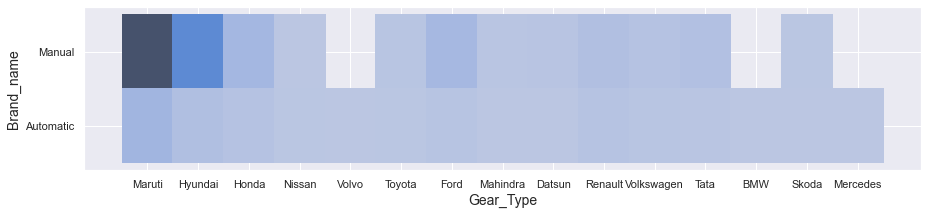

In [940]:
#visualize this column by histplot
plt.figure(figsize=(15,3))
sns.histplot(x= 'Brand_name',y= 'Gear_Type', data=df)
plt.xlabel('Gear_Type', fontsize = 14)
plt.ylabel('Brand_name', fontsize = 14)

In [941]:
df.groupby('Gear_Type')['Car_name'].value_counts().head(60) #check the relationship between two feature

Gear_Type  Car_name      
Automatic  Celerio            77
           Kwid               70
           Alto K10           60
           Grand i10          60
           Ecosport           59
           Jazz               48
           Dzire              43
           Wagon R 1.0        43
           Polo               33
           NEW SANTRO         31
           Swift              26
           IGNIS              25
           Vitara Brezza      23
           Baleno             22
           City               17
           i10                16
           Amaze              14
           Nano               14
           Tiago              13
           Brio               11
           Vento              11
           S PRESSO           10
           Redi Go             9
           Ciaz                8
           Creta               8
           Micra               8
           Elite i20           7
           GRAND I10 NIOS      7
           Glanza              7
           Verna 

In [942]:
df.groupby('Gear_Type')['Brand_name'].value_counts().head(60) #check the relationship between two feature

Gear_Type  Brand_name
Automatic  Maruti         352
           Hyundai        150
           Honda           92
           Renault         74
           Ford            64
           Volkswagen      46
           Tata            32
           Toyota          15
           Nissan          10
           Datsun           9
           Skoda            7
           BMW              4
           Mahindra         2
           Mercedes         2
           Volvo            1
Manual     Maruti        2398
           Hyundai       1211
           Honda          316
           Ford           285
           Renault        146
           Tata           124
           Volkswagen      92
           Datsun          51
           Toyota          44
           Mahindra        34
           Skoda           11
           Nissan           7
Name: Brand_name, dtype: int64

In [ ]:
#visualize this column by barplot
plt.figure(figsize=(10,7))
sns.barplot(y= 'Education',x= 'Fnlwgt', data=df)
plt.xlabel('Fnlwgt', fontsize = 14)
plt.ylabel('Education', fontsize = 14)

In [970]:
df['Fuel'].value_counts() #check the count of unique values

Petrol          4401
Diesel          1112
Petrol + CNG      65
Petrol + LPG       1
Name: Fuel, dtype: int64

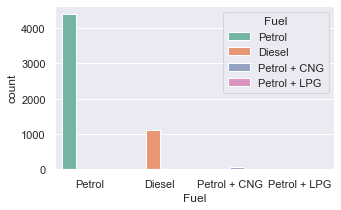

In [971]:
#plotting each class frequency
fig = plt.figure(figsize=(5,3))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Fuel",palette="Set2", data=df, hue = 'Fuel', order = df["Fuel"].value_counts().index)
plt.show()

Text(0, 0.5, 'Fuel')

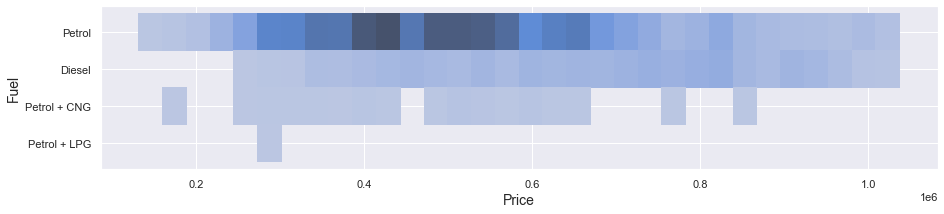

In [972]:
#visualize this column by histplot
plt.figure(figsize=(15,3))
sns.histplot(x= 'Price',y= 'Fuel', data=df)
plt.xlabel('Price', fontsize = 14)
plt.ylabel('Fuel', fontsize = 14)

In [973]:
df.groupby('Fuel')['Location'].value_counts().head(60) #check the relationship between two feature

Fuel          Location 
Diesel        New Delhi     328
              Pune          287
              Mumbai        279
              Ahemdabad     102
              Chennai        58
              Hyderabad      24
              Bengaluru      17
              Kolkata        17
Petrol        Pune         1014
              Mumbai        964
              Chennai       712
              New Delhi     588
              Ahemdabad     372
              Kolkata       321
              Bengaluru     233
              Hyderabad     197
Petrol + CNG  Pune           25
              Mumbai         24
              New Delhi      11
              Chennai         3
              Ahemdabad       2
Petrol + LPG  Chennai         1
Name: Location, dtype: int64

In [974]:
df.groupby('Fuel')['Gear_Type'].value_counts() #check the relationship between two feature

Fuel          Gear_Type
Diesel        Manual       1011
              Automatic     101
Petrol        Manual       3643
              Automatic     758
Petrol + CNG  Manual         64
              Automatic       1
Petrol + LPG  Manual          1
Name: Gear_Type, dtype: int64

In [975]:
df.groupby('Fuel')['Gear_Type'].value_counts(normalize = True) #check the relationship between two feature

Fuel          Gear_Type
Diesel        Manual       0.909173
              Automatic    0.090827
Petrol        Manual       0.827766
              Automatic    0.172234
Petrol + CNG  Manual       0.984615
              Automatic    0.015385
Petrol + LPG  Manual       1.000000
Name: Gear_Type, dtype: float64

In [976]:
df.groupby('Fuel')['Owner'].value_counts() #check the relationship between two feature

Fuel          Owner    
Diesel        1st Owner     911
              2nd Owner     189
              3rd Owner      10
              4th Owner       2
Petrol        1st Owner    3515
              2nd Owner     789
              3rd Owner      85
              4th Owner      12
Petrol + CNG  1st Owner      54
              2nd Owner      10
              3rd Owner       1
Petrol + LPG  1st Owner       1
Name: Owner, dtype: int64

Text(0, 0.5, 'Fuel')

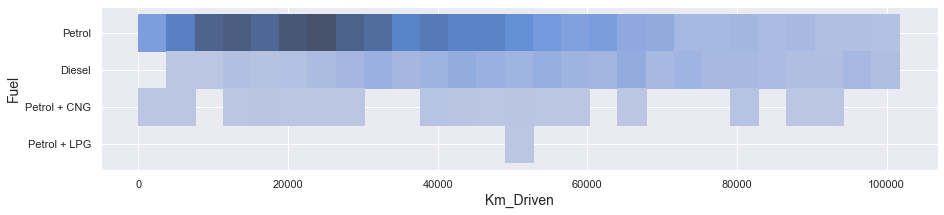

In [977]:
#visualize this column by histplot
plt.figure(figsize=(15,3))
sns.histplot(x= 'Km_Driven',y= 'Fuel', data=df)
plt.xlabel('Km_Driven', fontsize = 14)
plt.ylabel('Fuel', fontsize = 14)

In [978]:
df.groupby('Fuel')['Brand_name'].value_counts() #check the relationship between two feature

Fuel          Brand_name
Diesel        Maruti         634
              Ford           161
              Hyundai        155
              Mahindra        36
              Renault         27
              Honda           24
              Tata            23
              Toyota          16
              Volkswagen      14
              Skoda           10
              Nissan           5
              BMW              4
              Mercedes         2
              Volvo            1
Petrol        Maruti        2063
              Hyundai       1198
              Honda          380
              Renault        193
              Ford           187
              Tata           133
              Volkswagen     124
              Datsun          60
              Toyota          43
              Nissan          12
              Skoda            8
Petrol + CNG  Maruti          52
              Hyundai          8
              Honda            4
              Ford             1
Petrol + LPG  Maru

In [979]:
df.groupby('Fuel')['Car_name'].value_counts() #check the relationship between two feature

Fuel          Car_name     
Diesel        Vitara Brezza    189
              Ecosport         146
              Swift            119
              Ertiga            72
              Swift Dzire       72
                              ... 
Petrol + CNG  A Star             1
              Brio               1
              Ecosport           1
              i10                1
Petrol + LPG  Alto 800           1
Name: Car_name, Length: 143, dtype: int64

In [980]:
df['Owner'].value_counts() #check the count of unique values

1st Owner    4481
2nd Owner     988
3rd Owner      96
4th Owner      14
Name: Owner, dtype: int64

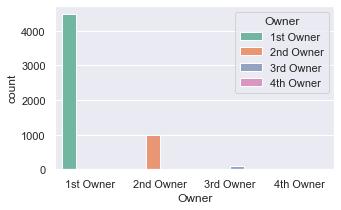

In [981]:
#plotting each class frequency
fig = plt.figure(figsize=(5,3))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Owner",palette="Set2", data=df, hue = 'Owner', order = df["Owner"].value_counts().index)
plt.show()

In [982]:
df.groupby('Owner')['Location'].value_counts() #check the relationship between two feature

Owner      Location 
1st Owner  Pune         1072
           Mumbai       1023
           New Delhi     739
           Chennai       607
           Ahemdabad     392
           Kolkata       290
           Bengaluru     182
           Hyderabad     176
2nd Owner  Pune          225
           Mumbai        218
           New Delhi     177
           Chennai       145
           Ahemdabad      74
           Bengaluru      63
           Kolkata        44
           Hyderabad      42
3rd Owner  Pune           26
           Mumbai         23
           Chennai        20
           Ahemdabad       9
           New Delhi       8
           Bengaluru       5
           Kolkata         3
           Hyderabad       2
4th Owner  Mumbai          3
           New Delhi       3
           Pune            3
           Chennai         2
           Ahemdabad       1
           Hyderabad       1
           Kolkata         1
Name: Location, dtype: int64

Text(0.5, 0, 'Owner')

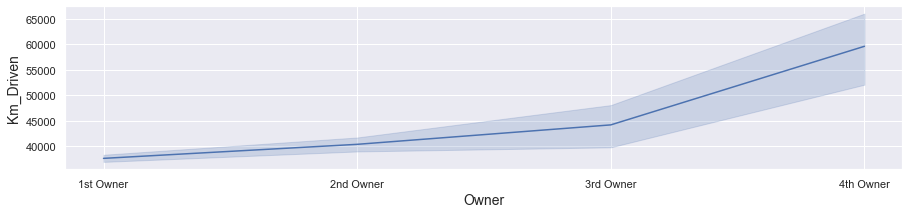

In [983]:
#visualize this column by histplot
plt.figure(figsize=(15,3))
sns.lineplot(y= 'Km_Driven',x= 'Owner', data=df)
plt.ylabel('Km_Driven', fontsize = 14)
plt.xlabel('Owner', fontsize = 14)

In [984]:
df.groupby('Owner')['Gear_Type'].value_counts() #check the relationship between two feature

Owner      Gear_Type
1st Owner  Manual       3816
           Automatic     665
2nd Owner  Manual        822
           Automatic     166
3rd Owner  Manual         71
           Automatic      25
4th Owner  Manual         10
           Automatic       4
Name: Gear_Type, dtype: int64

In [985]:
df.groupby('Owner')['Brand_name'].value_counts() #check the relationship between two feature

Owner      Brand_name
1st Owner  Maruti        2267
           Hyundai       1075
           Ford           300
           Honda          283
           Renault        180
           Tata           134
           Volkswagen      86
           Toyota          55
           Datsun          46
           Mahindra        27
           Nissan          16
           Skoda           12
2nd Owner  Maruti         427
           Hyundai        257
           Honda          114
           Ford            46
           Volkswagen      45
           Renault         38
           Tata            22
           Datsun          14
           Mahindra         9
           Skoda            6
           Toyota           4
           BMW              2
           Mercedes         2
           Nissan           1
           Volvo            1
3rd Owner  Maruti          47
           Hyundai         27
           Honda           11
           Volkswagen       4
           Ford             3
           BMW    

In [986]:
df.groupby('Owner')['Year of Purchase'].value_counts() #check the relationship between two feature

Owner      Year of Purchase
1st Owner  2017                917
           2018                884
           2016                638
           2019                605
           2015                472
           2014                342
           2020                242
           2013                204
           2012                 85
           2021                 41
           2011                 25
           2010                 14
           2009                  8
           2008                  4
2nd Owner  2017                171
           2016                155
           2018                153
           2015                140
           2014                124
           2019                 87
           2013                 84
           2011                 29
           2012                 26
           2020                  9
           2010                  5
           2009                  4
           2007                  1
3rd Owner  2016            

In [987]:
df['Km_Driven'].value_counts(bins=10) #check the counts of unique value

(20395.2, 30563.8]     1024
(10226.6, 20395.2]      882
(30563.8, 40732.4]      794
(40732.4, 50901.0]      744
(-43.687, 10226.6]      572
(50901.0, 61069.6]      543
(61069.6, 71238.2]      430
(71238.2, 81406.8]      250
(81406.8, 91575.4]      194
(91575.4, 101744.0]     146
Name: Km_Driven, dtype: int64

Text(0, 0.5, 'Price')

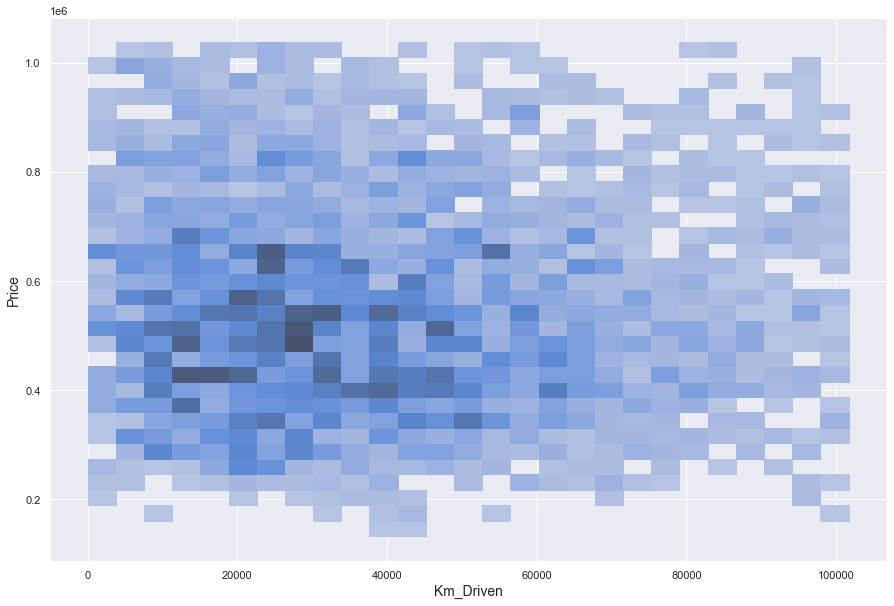

In [988]:
#visualize this column by histplot
plt.figure(figsize=(15,10))
sns.histplot(x= 'Km_Driven',y= 'Price', data=df)
plt.xlabel('Km_Driven', fontsize = 14)
plt.ylabel('Price', fontsize = 14)

Text(0.5, 0, 'Year of Purchase')

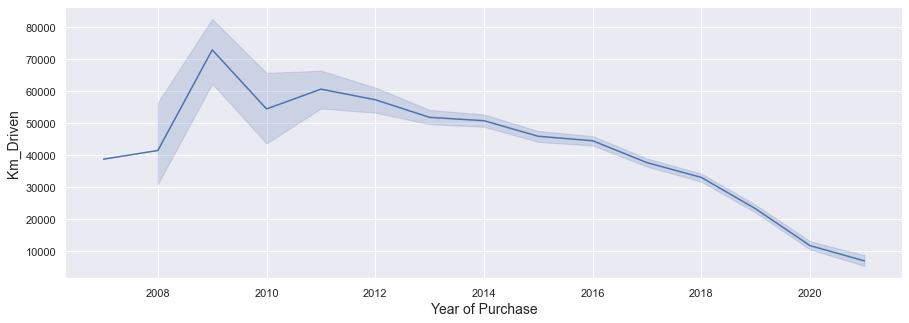

In [990]:
#visualize this column by histplot
plt.figure(figsize=(15,5))
sns.lineplot(y= 'Km_Driven',x= 'Year of Purchase', data=df)
plt.ylabel('Km_Driven', fontsize = 14)
plt.xlabel('Year of Purchase', fontsize = 14)

Text(0.5, 0, 'EMI')

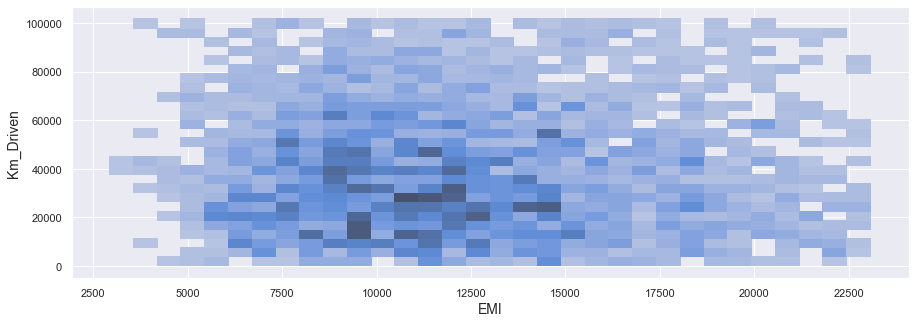

In [1010]:
#visualize this column by histplot
plt.figure(figsize=(15,5))
sns.histplot(y= 'Km_Driven',x= 'EMI', data=df)
plt.ylabel('Km_Driven', fontsize = 14)
plt.xlabel('EMI', fontsize = 14)

In [993]:
df['EMI'].value_counts(bins=10) #check the count of unique values

(8974.7, 10989.6]     1114
(10989.6, 13004.5]    1098
(6959.8, 8974.7]       830
(13004.5, 15019.4]     774
(15019.4, 17034.3]     502
(4944.9, 6959.8]       431
(17034.3, 19049.2]     413
(19049.2, 21064.1]     251
(21064.1, 23079.0]     131
(2909.85, 4944.9]       35
Name: EMI, dtype: int64

Text(0.5, 0, 'Year of Purchase')

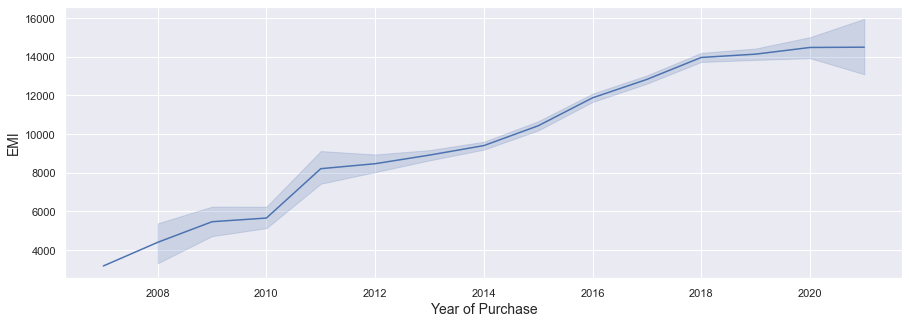

In [1011]:
#visualize this column by histplot
plt.figure(figsize=(15,5))
sns.lineplot(y= 'EMI',x= 'Year of Purchase', data=df)
plt.ylabel('EMI', fontsize = 14)
plt.xlabel('Year of Purchase', fontsize = 14)

Text(0.5, 0, 'Brand_name')

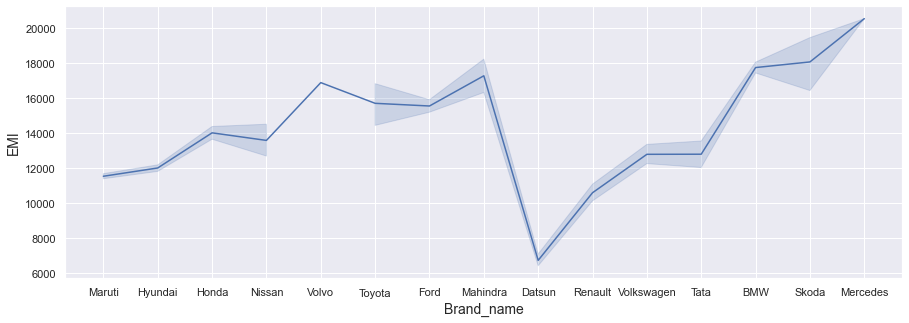

In [1013]:
#visualize this column by histplot
plt.figure(figsize=(15,5))
sns.lineplot(y= 'EMI',x= 'Brand_name', data=df)
plt.ylabel('EMI', fontsize = 14)
plt.xlabel('Brand_name', fontsize = 14)

Text(0.5, 0, 'Location')

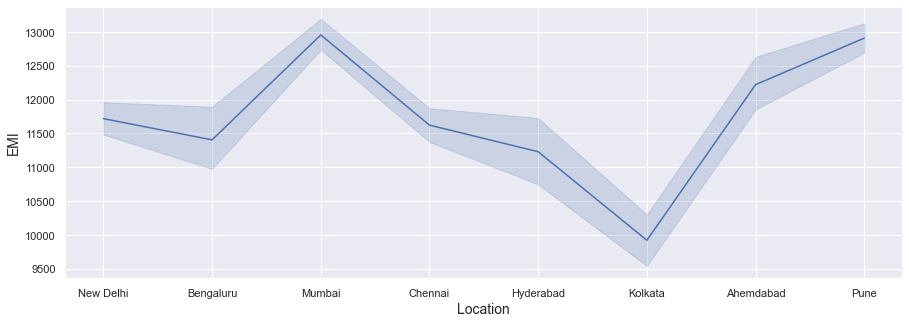

In [1018]:
#visualize this column by histplot
plt.figure(figsize=(15,5))
sns.lineplot(y= 'EMI',x= 'Location', data=df)
plt.ylabel('EMI', fontsize = 14)
plt.xlabel('Location', fontsize = 14)

Text(0.5, 0, 'Gear_Type')

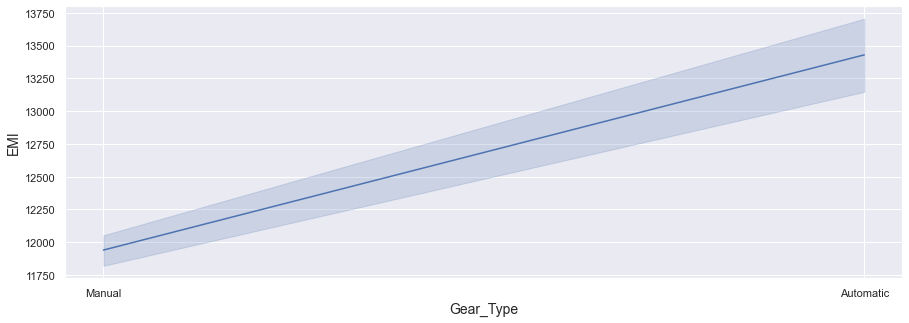

In [1019]:
#visualize this column by histplot
plt.figure(figsize=(15,5))
sns.lineplot(y= 'EMI',x= 'Gear_Type', data=df)
plt.ylabel('EMI', fontsize = 14)
plt.xlabel('Gear_Type', fontsize = 14)

Text(0.5, 0, 'Fuel')

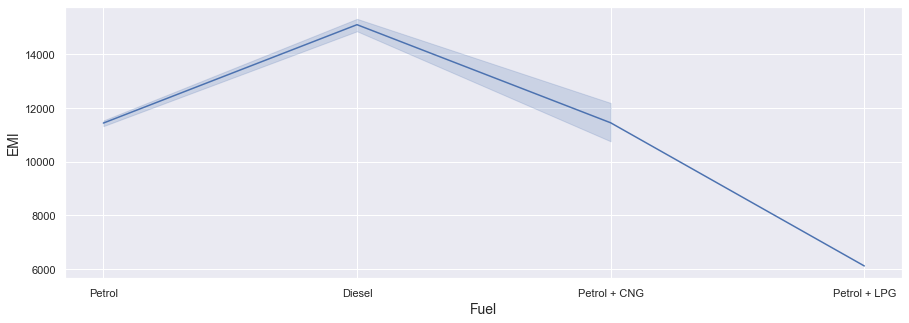

In [1020]:
#visualize this column by histplot
plt.figure(figsize=(15,5))
sns.lineplot(y= 'EMI',x= 'Fuel', data=df)
plt.ylabel('EMI', fontsize = 14)
plt.xlabel('Fuel', fontsize = 14)

Text(0.5, 0, 'Owner')

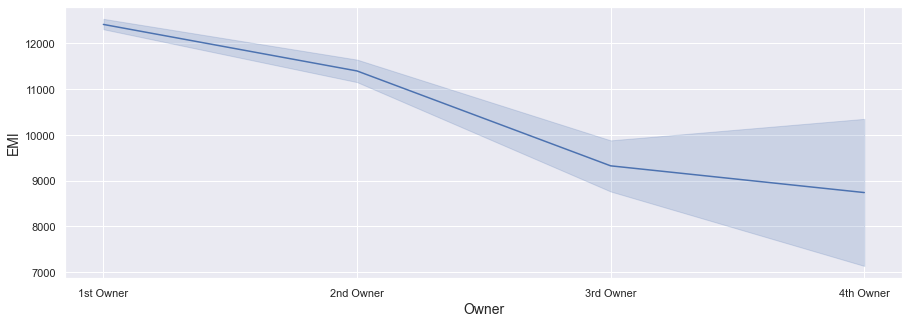

In [1021]:
#visualize this column by histplot
plt.figure(figsize=(15,5))
sns.lineplot(y= 'EMI',x= 'Owner', data=df)
plt.ylabel('EMI', fontsize = 14)
plt.xlabel('Owner', fontsize = 14)

Text(0.5, 0, 'Price')

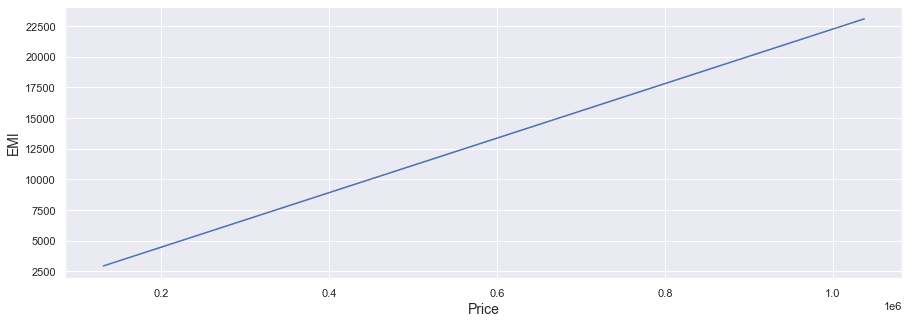

In [1022]:
#visualize this column by histplot
plt.figure(figsize=(15,5))
sns.lineplot(y= 'EMI',x= 'Price', data=df)
plt.ylabel('EMI', fontsize = 14)
plt.xlabel('Price', fontsize = 14)

In [994]:
df['Price'].value_counts(bins=10) #check the count of unique values

(403439.0, 494019.0]      1114
(494019.0, 584599.0]      1098
(312859.0, 403439.0]       830
(584599.0, 675179.0]       774
(675179.0, 765759.0]       502
(222279.0, 312859.0]       431
(765759.0, 856339.0]       413
(856339.0, 946919.0]       251
(946919.0, 1037499.0]      131
(130793.199, 222279.0]      35
Name: Price, dtype: int64

In [995]:
df['Year of Purchase'].value_counts() #check the count of unique values

2017    1099
2018    1044
2016     816
2019     692
2015     639
2014     484
2013     300
2020     252
2012     117
2011      54
2021      41
2010      22
2009      14
2008       4
2007       1
Name: Year of Purchase, dtype: int64

In [996]:
df['Brand_name'].value_counts() #check the count of unique values

Maruti        2750
Hyundai       1361
Honda          408
Ford           349
Renault        220
Tata           156
Volkswagen     138
Datsun          60
Toyota          59
Mahindra        36
Skoda           18
Nissan          17
BMW              4
Mercedes         2
Volvo            1
Name: Brand_name, dtype: int64

In [997]:
df['Car_name'].value_counts() #check the count of unique values

Grand i10        457
Baleno           414
Swift            366
Elite i20        319
Ecosport         281
                ... 
Safari Storme      1
Go                 1
Thar               1
MAGNITE            1
New Elantra        1
Name: Car_name, Length: 91, dtype: int64

In [998]:
df['Model_name'].value_counts() #check the count of unique values

VXI         1001
1.2          369
LXI          347
VDI          330
SPORTZ       322
            ... 
CROSS          1
SUMMUM         1
W10            1
Revotron       1
GL             1
Name: Model_name, Length: 112, dtype: int64

In [ ]:
#Using Label Encoder to convert columns into integer 

In [1028]:
lab_ene = LabelEncoder()

In [1029]:
df_location = lab_ene.fit_transform(df['Location'])

In [1035]:
pd.Series(df_location)

0       6
1       6
2       6
3       6
4       6
       ..
5574    7
5575    7
5576    7
5577    7
5578    7
Length: 5579, dtype: int32

In [1036]:
df['Location'] = df_location

In [1041]:
df_Gear_Type = lab_ene.fit_transform(df['Gear_Type'])

In [1042]:
pd.Series(df_Gear_Type)

0       1
1       1
2       1
3       1
4       1
       ..
5574    1
5575    0
5576    0
5577    1
5578    1
Length: 5579, dtype: int32

In [1043]:
df['Gear_Type'] = df_Gear_Type

In [1044]:
df_Fuel = lab_ene.fit_transform(df['Fuel'])

In [1045]:
pd.Series(df_Fuel)

0       1
1       1
2       1
3       1
4       1
       ..
5574    1
5575    1
5576    0
5577    0
5578    0
Length: 5579, dtype: int32

In [1046]:
df['Fuel'] = df_Fuel

In [1047]:
df_Owner = lab_ene.fit_transform(df['Owner'])

In [1048]:
pd.Series(df_Owner)

0       0
1       1
2       2
3       0
4       0
       ..
5574    0
5575    0
5576    1
5577    0
5578    0
Length: 5579, dtype: int32

In [1049]:
df['Owner'] = df_Owner

In [1050]:
df_Brand_name = lab_ene.fit_transform(df['Brand_name'])

In [1051]:
pd.Series(df_Brand_name)

0        6
1        6
2        6
3        6
4        6
        ..
5574     4
5575    12
5576    10
5577     2
5578     2
Length: 5579, dtype: int32

In [1052]:
df['Brand_name'] = df_Brand_name

In [1053]:
df_Car_name = lab_ene.fit_transform(df['Car_name'])

In [1054]:
pd.Series(df_Car_name)

0        5
1        5
2        5
3       66
4       66
        ..
5574    88
5575    18
5576    55
5577    22
5578    22
Length: 5579, dtype: int32

In [1055]:
df['Car_name'] = df_Car_name

In [1056]:
df_Model_name = lab_ene.fit_transform(df['Model_name'])

In [1057]:
pd.Series(df_Model_name)

0       88
1       88
2       88
3       88
4       88
        ..
5574    64
5575    86
5576    29
5577     7
5578     7
Length: 5579, dtype: int32

In [1058]:
df['Model_name'] = df_Model_name

In [1059]:
df.head() # check the final dataset

,Location,Km_Driven,Gear_Type,Fuel,Owner,EMI,Price,Year of Purchase,Brand_name,Car_name,Model_name
0,6,50739.0,1,1,0,7721.0,347099.0,2017,6,5,88
1,6,45043.0,1,1,1,6197.0,278599.0,2014,6,5,88
2,6,70313.0,1,1,2,5839.0,262499.0,2014,6,5,88
3,6,27252.0,1,1,0,7992.0,359299.0,2012,6,66,88
5,6,86875.0,1,1,0,7801.0,350699.0,2012,6,66,88


In [1060]:
df.isnull().sum() #check the null values

Location            0
Km_Driven           0
Gear_Type           0
Fuel                0
Owner               0
EMI                 0
Price               0
Year of Purchase    0
Brand_name          0
Car_name            0
Model_name          0
dtype: int64

In [1061]:
df.info() #now, we can see that, all coulumns are in integer or in float

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5579 entries, 0 to 6420
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Location          5579 non-null   int32  
 1   Km_Driven         5579 non-null   float64
 2   Gear_Type         5579 non-null   int32  
 3   Fuel              5579 non-null   int32  
 4   Owner             5579 non-null   int32  
 5   EMI               5579 non-null   float64
 6   Price             5579 non-null   float64
 7   Year of Purchase  5579 non-null   int32  
 8   Brand_name        5579 non-null   int32  
 9   Car_name          5579 non-null   int32  
 10  Model_name        5579 non-null   int32  
dtypes: float64(3), int32(8)
memory usage: 477.7 KB


In [1063]:
#store clean file to csv
df.to_csv('cleaned_file_car_price.csv')

correlation between the Features and with label:-----> (11, 11)

 **************************************************


<function matplotlib.pyplot.show(close=None, block=None)>

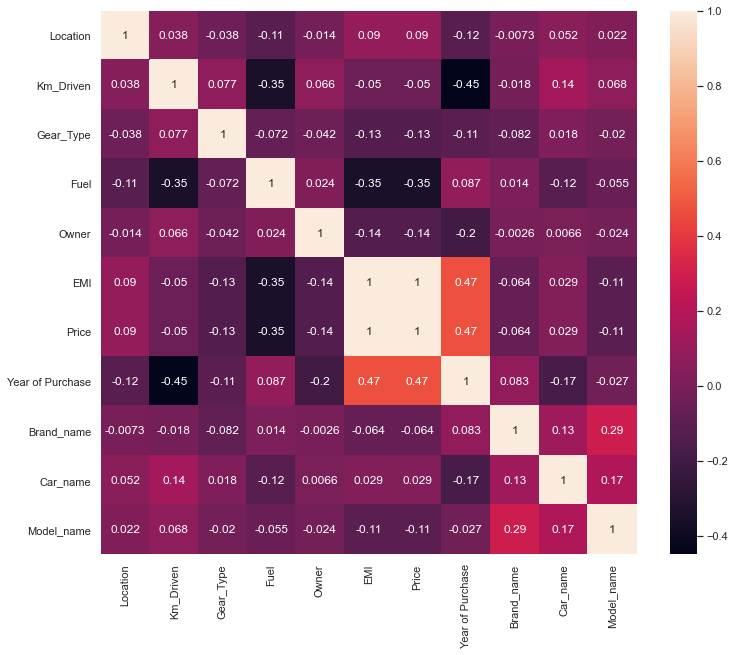

In [1064]:
# analyize the correlation
corr = df.corr()
print('correlation between the Features and with label:----->',corr.shape)
print("\n",'*'*50)
# Visualize the corrrelation by using heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True)
plt.show

In [1065]:
#split x and y
x = df.drop(['Price'], axis=1)
y=df.Price

In [1068]:
#scale the value x
Scaler = StandardScaler()
x_scaled = Scaler.fit_transform(x)
x_scaled

array([[ 0.66905252,  0.52974933,  0.42689811, ...,  0.21794529,
        -1.28938512,  0.91605117],
       [ 0.66905252,  0.28773006,  0.42689811, ...,  0.21794529,
        -1.28938512,  0.91605117],
       [ 0.66905252,  1.36143563,  0.42689811, ...,  0.21794529,
        -1.28938512,  0.91605117],
       ...,
       [ 1.10911901,  2.17472405, -2.34247931, ...,  1.93898815,
         0.57018317, -0.75994415],
       [ 1.10911901,  0.47264366,  0.42689811, ..., -1.50309757,
        -0.6571319 , -1.38489156],
       [ 1.10911901, -0.30882025,  0.42689811, ..., -1.50309757,
        -0.6571319 , -1.38489156]])

In [1069]:
# Check the multicollinearity between the features
#import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["vif"]= [ variance_inflation_factor(x_scaled, i)
               for i in range ( x_scaled.shape[1])]
vif['features']= x.columns
vif #no multicollinearity between the features

,vif,features
0,1.053619,Location
1,1.443722,Km_Driven
2,1.052056,Gear_Type
3,1.408435,Fuel
4,1.052010,Owner
5,1.759220,EMI
6,1.908020,Year of Purchase
7,1.132028,Brand_name
8,1.102613,Car_name
9,1.139932,Model_name


In [1070]:
#split data into train and test.
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y,test_size = 0.25, random_state=40)

In [ ]:
y_train.head()

In [ ]:
# Check the Accuracy by using 5 classification models

In [1071]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor #import library
from sklearn import metrics
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [1106]:
#Model instantiating and training
lr = LinearRegression()
dtr=DecisionTreeRegressor()
rfo = RandomForestRegressor()
svr = SVR()
knn = KNeighborsRegressor()
ada = AdaBoostRegressor() 

In [1107]:
#train all the models
print('Linear Regression:----->',lr.fit(x_train, y_train))
time.sleep(2)
print('Decsion Tree:------->',dtr.fit(x_train, y_train))
time.sleep(2)
print('Random Forest:-------->',rfo.fit(x_train, y_train))
time.sleep(2)
print('Support vector machine:-------->',svr.fit(x_train, y_train))
time.sleep(2)
print('KNeighborsRegressor:-------->',knn.fit(x_train, y_train))
time.sleep(2)
print('Adaboost Regressor:-------->',ada.fit(x_train,y_train))

Linear Regression:-----> LinearRegression()
Decsion Tree:-------> DecisionTreeRegressor()
Random Forest:--------> RandomForestRegressor()
Support vector machine:--------> SVR()
KNeighborsRegressor:--------> KNeighborsRegressor()
Adaboost Regressor:--------> AdaBoostRegressor()


In [1108]:
#Check How much our model learn
print('Linear regression Score:-------->', lr.score(x_train, y_train))
time.sleep(2)
print('Decision Tree score:------->', dtr.score(x_train,y_train))
time.sleep(2)
print('Random Forest score:------>',rfo.score(x_train, y_train))
time.sleep(2)
print('Support vector machine score:------>',svr.score(x_train, y_train))
time.sleep(2)
print('KNeighborsRegressor score:------>',knn.score(x_train, y_train))
time.sleep(2)
print('Adaboost Regressor:-------->',ada.score(x_train,y_train))

Linear regression Score:--------> 0.9999999948968942
Decision Tree score:-------> 1.0
Random Forest score:------> 0.9999980246618797
Support vector machine score:------> -0.015397222875344063
KNeighborsRegressor score:------> 0.9632515861028651
Adaboost Regressor:--------> 0.995405242580287


In [1109]:
#Let's check how well model fits the test data
print('Linear regression Score:-------->', lr.score(x_test, y_test))
time.sleep(2)
print('Decision Tree score:------->', dtr.score(x_test,y_test))
time.sleep(2)
print('Random Forest score:------>',rfo.score(x_test, y_test))
time.sleep(2)
print('Support vector machine score:------>',svr.score(x_test, y_test))
time.sleep(2)
print('KNeighborsRegressor score:------>',knn.score(x_test, y_test))
time.sleep(2)
print('Adaboost Regressor:-------->',ada.score(x_test,y_test))

Linear regression Score:--------> 0.9999999952543087
Decision Tree score:-------> 0.9999961567397665
Random Forest score:------> 0.9999980615764602
Support vector machine score:------> -0.015006432620055188
KNeighborsRegressor score:------> 0.9346189259043897
Adaboost Regressor:--------> 0.9959492191103991


In [1110]:
y_pred_lr = lr.predict(x_test)#save the predictions in some variables
y_pred_dtr = dtr.predict(x_test)
y_pred_rfo = rfo.predict(x_test)
y_pred_svr = svr.predict(x_test)
y_pred_knn = knn.predict(x_test)
y_pred_ada = ada.predict(x_test)

In [1111]:
#check all model cv score
print("Linear regression CV Score:")
print(cross_val_score(lr,x_scaled,y,cv=5))

time.sleep(2)
print("\n",'*'*50)

print("Decision Tree CV Score:")
print(cross_val_score(dtr,x_scaled,y,cv=5))

time.sleep(2)
print("\n",'*'*50)

print("Random Forest CV Score:")
print(cross_val_score(rfo,x_scaled,y,cv=5))

time.sleep(2)
print("\n",'*'*50)

print("KNeighbour Classifier CV Score:")
print(cross_val_score(knn,x_scaled,y,cv=5))

time.sleep(2)
print("\n",'*'*50)

print("Support Vector Machine CV Score:")
print(cross_val_score(svr,x_scaled,y,cv=5))

time.sleep(2)
print("\n",'*'*50)

print("Ada Boost CV Score:")
print(cross_val_score(ada,x_scaled,y,cv=5))

Linear regression CV Score:
[0.99999999 1.         0.99999999 1.         1.        ]

 **************************************************
Decision Tree CV Score:
[0.99991749 0.99999931 0.99999122 0.99999311 0.99999883]

 **************************************************
Random Forest CV Score:
[0.99991282 0.99999872 0.99999806 0.99999682 0.99999814]

 **************************************************
KNeighbour Classifier CV Score:
[0.89595575 0.95104546 0.91879241 0.91879185 0.949735  ]

 **************************************************
Support Vector Machine CV Score:
[-0.00073282 -0.14339883 -0.00019816 -0.00208954 -0.07351067]

 **************************************************
Ada Boost CV Score:
[0.99499328 0.99569962 0.9931046  0.99558466 0.99563955]


In [1112]:
#Check the mean of all models cv score one by one
print("Linear regression CV Score:")
print(cross_val_score(lr,x_scaled,y,cv=5).mean())

time.sleep(2)
print("\n",'*'*50)

print("Decision Tree CV Score:")
print(cross_val_score(dtr,x_scaled,y,cv=5).mean())

time.sleep(2)
print("\n",'*'*50)

print("Random Forest CV Score:")
print(cross_val_score(rfo,x_scaled,y,cv=5).mean())

time.sleep(2)
print("\n",'*'*50)

print("KNeighbour Classifier CV Score:")
print(cross_val_score(knn,x_scaled,y,cv=5).mean())

time.sleep(2)
print("\n",'*'*50)

print("Support Vector Machine CV Score:")
print(cross_val_score(svr,x_scaled,y,cv=5).mean())

time.sleep(2)
print("\n",'*'*50)

print("Ada Boost CV Score:")
print(cross_val_score(ada,x_scaled,y,cv=5).mean())

Linear regression CV Score:
0.9999999948239896

 **************************************************
Decision Tree CV Score:
0.999973856858006

 **************************************************
Random Forest CV Score:
0.9999794106893752

 **************************************************
KNeighbour Classifier CV Score:
0.9268640942704289

 **************************************************
Support Vector Machine CV Score:
-0.04398600594237627

 **************************************************
Ada Boost CV Score:
0.9954871612385767


In [1090]:
from sklearn.model_selection import KFold, StratifiedKFold
kfold_validation = KFold(10)
skfold = StratifiedKFold(n_splits = 5)

In [1113]:
#check all model cv score
print("Linear regression CV Score:")
print(cross_val_score(lr,x_scaled,y,cv=kfold_validation))
a = cross_val_score(lr,x_scaled,y,cv=kfold_validation)

time.sleep(2)
print("\n",'*'*50)

print("Decision Tree CV Score:")
print(cross_val_score(dtr,x_scaled,y,cv=kfold_validation))
b = cross_val_score(dtr,x_scaled,y,cv=kfold_validation)

time.sleep(2)
print("\n",'*'*50)

print("Random Forest CV Score:")
print(cross_val_score(rfo,x_scaled,y,cv=kfold_validation))
c = cross_val_score(rfo,x_scaled,y,cv=kfold_validation)

time.sleep(2)
print("\n",'*'*50)

print("KNeighbour Regressor CV Score:")
print(cross_val_score(knn,x_scaled,y,cv=kfold_validation))
d = cross_val_score(knn,x_scaled,y,cv=kfold_validation)

time.sleep(2)
print("\n",'*'*50)

print("Support Vector Machine CV Score:")
print(cross_val_score(svr,x_scaled,y,cv=kfold_validation))
e = cross_val_score(svr,x_scaled,y,cv=kfold_validation)


time.sleep(2)
print("\n",'*'*50)

print("Ada Boost Regressor CV Score:")
print(cross_val_score(ada,x_scaled,y,cv=kfold_validation))
f = cross_val_score(ada,x_scaled,y,cv=kfold_validation)

Linear regression CV Score:
[0.99999999 0.99999999 1.         1.         0.99999999 0.99999999
 0.99999999 1.         1.         1.        ]

 **************************************************
Decision Tree CV Score:
[0.99983479 0.99999123 0.99999959 0.99999957 0.99999686 0.99999615
 0.99998838 0.99999578 0.99999713 0.99999909]

 **************************************************
Random Forest CV Score:
[0.99982409 0.99999702 0.99999932 0.99999864 0.99999826 0.99999862
 0.99999642 0.999998   0.99999914 0.99999877]

 **************************************************
KNeighbour Regressor CV Score:
[0.93042361 0.91221691 0.95551376 0.95519892 0.92747872 0.91660045
 0.92014611 0.92786595 0.95441033 0.95147835]

 **************************************************
Support Vector Machine CV Score:
[-0.0318159  -0.05522681 -0.10216573 -0.14942465 -0.03284088 -0.07597613
 -0.03820771 -0.08546604 -0.03935679 -0.10435109]

 **************************************************
Ada Boost Regressor 

In [1114]:
#Check the mean of all models cv score one by one
print("Linear regression CV Score:")
print("Mean value of CV score:----->", a.mean())
print("Min value of CV score:----->", a.min())
print("Max value of CV score:----->", a.max())

time.sleep(2)
print("\n",'*'*50)

print("Decision Tree CV Score:")
print("Mean value of CV score:----->", b.mean())
print("Min value of CV score:----->", b.min())
print("Max value of CV score:----->", b.max())

time.sleep(2)
print("\n",'*'*50)

print("Random Forest CV Score:")
print("Mean value of CV score:----->", c.mean())
print("Min value of CV score:----->", c.min())
print("Max value of CV score:----->", c.max())

time.sleep(2)
print("\n",'*'*50)

print("KNeighbour Regressor CV Score:")
print("Mean value of CV score:----->", d.mean())
print("Min value of CV score:----->", d.min())
print("Max value of CV score:----->", d.max())

time.sleep(2)
print("\n",'*'*50)

print("Support Vector Machine CV Score:")
print("Mean value of CV score:----->", e.mean())
print("Min value of CV score:----->", e.min())
print("Max value of CV score:----->", e.max())

time.sleep(2)
print("\n",'*'*50)

print("Ada Boost Regressor CV Score:")
print("Mean value of CV score:----->", f.mean())
print("Min value of CV score:----->", f.min())
print("Max value of CV score:----->", f.max())

Linear regression CV Score:
Mean value of CV score:-----> 0.9999999946591721
Min value of CV score:-----> 0.9999999928857907
Max value of CV score:-----> 0.999999995250144

 **************************************************
Decision Tree CV Score:
Mean value of CV score:-----> 0.9999819035907175
Min value of CV score:-----> 0.9998515798086546
Max value of CV score:-----> 0.9999994682570283

 **************************************************
Random Forest CV Score:
Mean value of CV score:-----> 0.999981197571163
Min value of CV score:-----> 0.9998285216435538
Max value of CV score:-----> 0.9999991777490377

 **************************************************
KNeighbour Regressor CV Score:
Mean value of CV score:-----> 0.9351333132148347
Min value of CV score:-----> 0.9122169144251997
Max value of CV score:-----> 0.9555137645433837

 **************************************************
Support Vector Machine CV Score:
Mean value of CV score:-----> -0.0714831730210688
Min value of CV scor

Linear Regression:


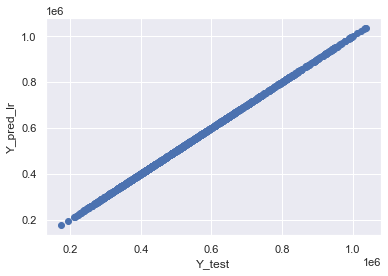

Decision Tree:


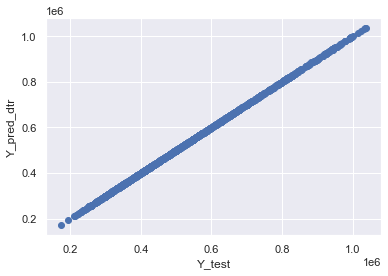

Random Forest:


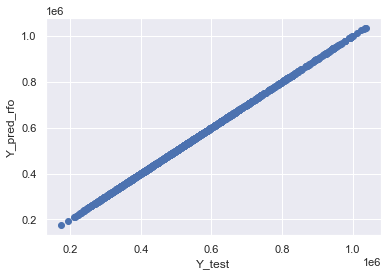

Support vector machine:


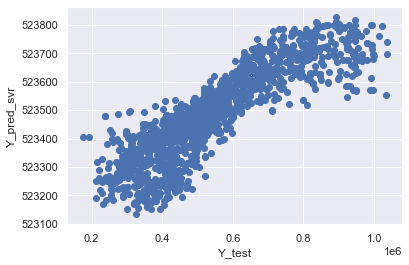

KNeighbors:


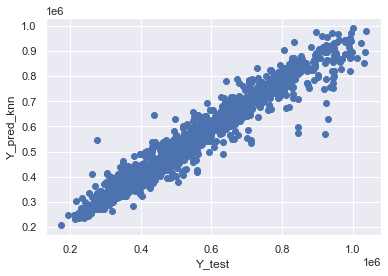

Ada Booster:


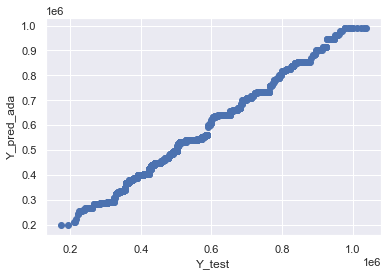

In [1115]:
#plot the actual and predicted value
print("Linear Regression:")
plt.scatter(y_test,y_pred_lr)
plt.xlabel('Y_test')
plt.ylabel('Y_pred_lr')
plt.show()
time.sleep(2)
print("Decision Tree:")
plt.scatter(y_test,y_pred_dtr)
plt.xlabel('Y_test')
plt.ylabel('Y_pred_dtr')
plt.show()
time.sleep(2)
print("Random Forest:")
plt.scatter(y_test,y_pred_rfo)
plt.xlabel('Y_test')
plt.ylabel('Y_pred_rfo')
plt.show()
time.sleep(2)
print("Support vector machine:")
plt.scatter(y_test,y_pred_svr)
plt.xlabel('Y_test')
plt.ylabel('Y_pred_svr')
plt.show()
time.sleep(2)
print("KNeighbors:")
plt.scatter(y_test,y_pred_knn)
plt.xlabel('Y_test')
plt.ylabel('Y_pred_knn')
plt.show()
time.sleep(2)
print("Ada Booster:")
plt.scatter(y_test,y_pred_ada)
plt.xlabel('Y_test')
plt.ylabel('Y_pred_ada')
plt.show()

In [1116]:
#calculate Mean absolute error
print("Linear Regression:")
print('MAE:--------->',mean_absolute_error(y_test, y_pred_lr))#calculate Mean absolute error
time.sleep(1)
print('MSE:----------->',mean_squared_error(y_test,y_pred_lr))#calculate mean squared error
time.sleep(1)
print('RSME:--------->',np.sqrt(mean_squared_error(y_test,y_pred_lr)))#calculate root mean square error

time.sleep(2)

print("Decision Tree:")
print('MAE:--------->',mean_absolute_error(y_test, y_pred_dtr))#calculate Mean absolute error
time.sleep(1)
print('MSE:----------->',mean_squared_error(y_test,y_pred_dtr))#calculate mean squared error
time.sleep(1)
print('RSME:--------->',np.sqrt(mean_squared_error(y_test,y_pred_dtr)))#calculate root mean square error

time.sleep(2)

print("Random Forest:")
print('MAE:--------->',mean_absolute_error(y_test, y_pred_rfo))#calculate Mean absolute error
time.sleep(1)
print('MSE:----------->',mean_squared_error(y_test,y_pred_rfo))#calculate mean squared error
time.sleep(1)
print('RSME:--------->',np.sqrt(mean_squared_error(y_test,y_pred_rfo)))#calculate root mean square error

time.sleep(2)

print("Support vector machine:")
print('MAE:--------->',mean_absolute_error(y_test, y_pred_svr))#calculate Mean absolute error
time.sleep(1)
print('MSE:----------->',mean_squared_error(y_test,y_pred_svr))#calculate mean squared error
time.sleep(1)
print('RSME:--------->',np.sqrt(mean_squared_error(y_test,y_pred_svr)))#calculate root mean square error

time.sleep(2)

print("KNeighbors:")
print('MAE:--------->',mean_absolute_error(y_test, y_pred_knn))#calculate Mean absolute error
time.sleep(1)
print('MSE:----------->',mean_squared_error(y_test,y_pred_knn))#calculate mean squared error
time.sleep(1)
print('RSME:--------->',np.sqrt(mean_squared_error(y_test,y_pred_knn)))#calculate root mean square error

time.sleep(2)

print("Ada Booster:")
print('MAE:--------->',mean_absolute_error(y_test, y_pred_ada))#calculate Mean absolute error
time.sleep(1)
print('MSE:----------->',mean_squared_error(y_test,y_pred_ada))#calculate mean squared error
time.sleep(1)
print('RSME:--------->',np.sqrt(mean_squared_error(y_test,y_pred_ada)))#calculate root mean square error

Linear Regression:
MAE:---------> 10.88715296787411
MSE:-----------> 162.6959171597756
RSME:---------> 12.755230972419731
Decision Tree:
MAE:---------> 144.27903974260968
MSE:-----------> 131757.9917593832
RSME:---------> 362.98483681743954
Random Forest:
MAE:---------> 123.38098709768016
MSE:-----------> 66454.72262372014
RSME:---------> 257.7881351492348
Support vector machine:
MAE:---------> 149475.63564026458
MSE:-----------> 34797333789.91331
RSME:---------> 186540.4347317581
KNeighbors:
MAE:---------> 31938.69911882822
MSE:-----------> 2241450877.2868376
RSME:---------> 47343.96347251503
Ada Booster:
MAE:---------> 9291.32351364222
MSE:-----------> 138872395.47969303
RSME:---------> 11784.413242910867


In [ ]:
#Lasso regression

In [1079]:
#import Ridge, Lasso, RidgeCV, LassoCV
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV

In [1080]:
#to find best alpha
lassocv= LassoCV(alphas=None, max_iter = 1000, normalize = True)

In [1081]:
#train the model
lassocv.fit(x_train,y_train)

LassoCV(normalize=True)

In [1082]:
#best alpha parameter
alpha = lassocv.alpha_
alpha

2.798304510697585

In [1084]:
#fit the data
lasso_reg = Lasso(alpha)

In [1085]:
lasso_reg.fit(x_train,y_train) #train the data

Lasso(alpha=2.798304510697585)

In [1086]:
lasso_reg.score(x_test,y_test) #get the score of test data

0.9999999949366178

In [ ]:
#Ridge Regression

In [1100]:
ridgecv= RidgeCV(alphas=np.arange(0.001,0.1,0.01), normalize = True)

In [1101]:
#train the data
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [1102]:
#best alpha parameter
ridgecv.alpha_

0.001

In [1103]:
#fit the data
ridge_model = Ridge(alpha = ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.001)

In [1104]:
ridge_model.score(x_test,y_test) #get the score

0.999999995254457

In [ ]:
# Using RandomSearchCV by using AdaBooster as a estimator

In [1118]:
params = {'n_estimators': [40,47,49,50], 'learning_rate' :[.30,.40,.45]}

In [1119]:
rnd_srch = RandomizedSearchCV(AdaBoostRegressor(), cv =5, param_distributions = params ) #using randomsearchCv

In [1120]:
rnd_srch.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(),
                   param_distributions={'learning_rate': [0.3, 0.4, 0.45],
                                        'n_estimators': [40, 47, 49, 50]})

In [1121]:
rnd_srch.best_estimator_ 

AdaBoostRegressor(learning_rate=0.45, n_estimators=49)

In [1122]:
ada = AdaBoostRegressor( base_estimator = lr, learning_rate = 0.45, n_estimators = 47)

In [1123]:
ada.fit(x_train,y_train) #fit the data

AdaBoostRegressor(base_estimator=LinearRegression(), learning_rate=0.45,
                  n_estimators=47)

In [1124]:
y_pred = ada.predict(x_test) #predict it

In [1125]:
r2_score(y_test,y_pred) #get the score

0.999999995250173

In [ ]:
#XGBoost Regressor

In [1126]:
import xgboost as xgb #import libraries
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [1127]:
xgbr = xgb.XGBRegressor()  #to improve accuracy
xgbr.fit(x_train,y_train)
y_pred = xgbr.predict(x_test)
r2_score(y_test, y_pred)

0.9999836886834499

In [ ]:
# GradientBoostingRegressor

In [1128]:
gradientregressor = GradientBoostingRegressor(max_depth=3, n_estimators=6, learning_rate=.4) 
#using GBR

In [1129]:
gbr = gradientregressor.fit(x_train,y_train) #fit the data

In [1130]:
r2_score(y_test,y_pred) #predict it

0.9999836886834499

In [ ]:
# Using GridSearchCV for GBR to improve accuracy

In [1143]:
start_time = time.time()
grid_params = {
    'max_depth': range(4,12,2),
    'learning_rate': np.arange(0.1,1,0.1),
    'min_samples_split': range(4,8,2)
}
time.sleep(2)
grid = GridSearchCV(gbr, param_grid = grid_params)
time.sleep(2)
print(grid.fit(x_train, y_train)) #fit the data
time.sleep(2)
print("\n",'*'*50)
print('GridSearchCV best parameters:----->',gridsearch.best_params_) 
time.sleep(2)
print("\n",'*'*50)
a = grid.best_estimator_
print('Trained Model using best parameters:----->',a.fit(x_train,y_train)) #train the model
time.sleep(2)
y_pred = a.predict(x_test) # predict it
r2_score(y_test, y_pred) # get the improved r2 score
print('Accuracy score:------>',r2_score(y_test, y_pred))#check the accuracy score
print("\n",'*'*50)
end_time = time.time()
T = (end_time - start_time)/60
print("Total time taken (in mins):------>", T )

GridSearchCV(estimator=GradientBoostingRegressor(learning_rate=0.4,
                                                 n_estimators=6),
             param_grid={'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'max_depth': range(4, 12, 2),
                         'min_samples_split': range(4, 8, 2)})

 **************************************************
GridSearchCV best parameters:-----> {'algorithm': 'brute', 'leaf_size': 1, 'n_neighbors': 3}

 **************************************************
Trained Model using best parameters:-----> GradientBoostingRegressor(learning_rate=0.8, max_depth=10, min_samples_split=6,
                          n_estimators=6)
Accuracy score:------> 0.9999976694927434

 **************************************************
Total time taken (in mins):------> 0.38786216974258425


In [ ]:
# Saving the model

In [ ]:
#We see,Linear regression is giving us best accuracy and there MSE, MAE and RSME are better than other regressor, 
#so, this is our best model

In [1144]:
with open('Car_price_prediction','wb') as f:
     pickle.dump(LinearRegression(),f)

In [1192]:
df.head(5)

,Location,Km_Driven,Gear_Type,Fuel,Owner,EMI,Price,Year of Purchase,Brand_name,Car_name,Model_name
0,New Delhi,50739,Manual,Petrol,1st Owner,7721,347099,2017,Maruti,Alto K10,VXI
1,New Delhi,45043,Manual,Petrol,2nd Owner,6197,278599,2014,Maruti,Alto K10,VXI
2,New Delhi,70313,Manual,Petrol,3rd Owner,5839,262499,2014,Maruti,Alto K10,VXI
3,New Delhi,27252,Manual,Petrol,1st Owner,7992,359299,2012,Maruti,Swift,VXI
4,New Delhi,170926,Manual,Petrol,1st Owner,8168,367199,2014,Maruti,Swift,VXI


In [ ]:
#predict the price of car

In [1194]:
print("The price of car is:----->", lr.predict(Scaler.transform([[6,50739.0,1,1,0,7721,2017,6,5,88]])))

The price of car is:-----> [347099.0840559]
